### ED Figure 5

In [1]:
%run IMP.ipynb

#### Input Data

In [2]:
sie_m_mp = xr.open_dataset('ESM15/sie_mw_esm-hist-ssp585.nc').sie

In [3]:
sie_wthmp = xr.open_dataset('sie_WTM.nc').sie
sie_wthp = xr.open_dataset('sie_WT.nc').sie
sie_mp = sie_wthmp - sie_wthp

In [4]:
sie_wthmp_mod = np.zeros((len(sie_wthmp)))
sie_wthmp_mod[0:len(sie_obs)] = sie_wthmp[0:len(sie_obs)]
sie_wthmp_mod[len(sie_obs):]  = np.nan

#### Plot

In [5]:
def make_plot():
    ''''''
    ncol,nrow = 1,2
    
    ny,nyear = 2001-2110,len(year)
    time_obs  = range(1,len(year_obs)+1,1)
    time_mdl  = range(1,nyear+1,1)
    
    xx = [0,nyear+1]
    x_ticks_major = range(1-1,nyear+2,10)
    x_ticks_minor = range(1-1,nyear+2,1)
    x_labels_major = [str(ii) for ii in range(year[0]+ny-1,year[-1]+ny+2,10)]
    x_labels_minor = ['' for ii in range(year[0]+ny-1,year[-1]+ny+2,1)]
    x_labels_minor[0] = str(year[0]+ny)
    
    titles = ['Sea Ice Extent','Sea Ice Extent Anomaly Driven by Meltwater']
    colors_1 = ['black','darkorange','royalblue','crimson']
    colors_2 = ['violet','grey']
    legends_1 = ['OBS','W$+$T$+$M [ACCESS-OM2-01]','W$+$T [ACCESS-OM2-01]','Hist+SSP5-8.5 [CMIP6]']
    legends_2 = ['ACCESS-ESM1.5','W$+$T$+$M minus W$+$T [ACCESS-OM2-01]']
    zorders = [20,15,10,10,5]
    
    fs_0,fs_1,fs_2,fs_3,fs_4 = 9.5,11,12.5,13,13.5
    lw_1,lw_2,lw_3,lw_4,lw_f = 6,2,1,4,1.2
    ''''''
    fig = plt.figure(1,figsize=(7.5*ncol,5*nrow))
    gs = gridspec.GridSpec(ncols=ncol,nrows=nrow,wspace=0.0,hspace=0.25,width_ratios=np.ones((ncol)),height_ratios=np.ones((nrow)))
    plt.suptitle('',fontsize=fs_3,y=0.95)
    
    for ii in np.arange(nrow):
        ax = plt.subplot(gs[ii])
        ######
        if ii==0:
            colors = colors_1
            legends = legends_1
            yy = [0,14]
            y_ticks_major = np.arange(0,14+1,2)
            y_ticks_minor = np.arange(0,14+1,1)
            ###
            plt.plot(time_obs,sie_obs,linestyle='-',color=colors[0],linewidth=lw_2,zorder=zorders[0],\
                     marker='o',markersize=5.5,markeredgewidth=lw_2,markeredgecolor=colors[0],markerfacecolor='white',markevery=1)
            plt.plot(time_mdl,sie_wthmp_mod,linestyle='-',color=colors[0],linewidth=lw_2+0.5,zorder=zorders[1])
            plt.plot(time_mdl,sie_wthp,linestyle='-',color=colors[1],linewidth=lw_1,zorder=zorders[2])
            plt.plot(time_mdl,sie_cmip6.mean(axis=0),linestyle='-',color=colors[2],linewidth=lw_1,zorder=zorders[3])
            for ie in range(nmdl):
                plt.plot(time_mdl,sie_cmip6[ie,:],linestyle='-',color=colors[2],linewidth=lw_3,zorder=zorders[4],alpha=0.5)
            #LEGENDS#
            lines = ax.get_lines()
            leg_1 = plt.legend([lines[i] for i in [0,1]],[legends[0],legends[1]],\
                               loc=2,fontsize=fs_2,bbox_to_anchor=(0.015,1.025),ncol=1,handlelength=2,handletextpad=0.5,columnspacing=1,labelspacing=0.25)
            leg_2 = plt.legend([lines[i] for i in [3,2]],[legends[3],legends[2]],\
                               loc=2,fontsize=fs_2,bbox_to_anchor=(0.525,1.025),ncol=1,handlelength=2,handletextpad=0.5,columnspacing=1,labelspacing=0.25)
            ax.add_artist(leg_1)
            ax.add_artist(leg_2)
            plt.setp(leg_1.get_texts(),color='black')
            plt.setp(leg_2.get_texts(),color='black')
            leg_1.get_frame().set_facecolor('none')
            leg_2.get_frame().set_facecolor('none')
            leg_1.get_frame().set_edgecolor('black')
            leg_2.get_frame().set_edgecolor('black')
            leg_1.get_frame().set_linewidth(0.0)
            leg_2.get_frame().set_linewidth(0.0)
        ######
        elif ii==1:
            colors = colors_2
            legends = legends_2
            yy = [-0.9,1.5]
            y_ticks_major = np.arange(yy[0],yy[1]+0.1,0.3)
            y_ticks_minor = np.arange(yy[0],yy[1]+0.1,0.1)
            ###
            plt.plot(time_mdl,sie_m_mp.mean(axis=0),linestyle='-',color=colors[1],linewidth=lw_1,zorder=zorders[1],label=legends[0])
            plt.plot(time_mdl,sie_mp,linestyle='-',color=colors[0],linewidth=lw_1,zorder=zorders[0],label=legends[1])
            for ie in range(nens):
                plt.plot(time_mdl,sie_m_mp[ie,:],linestyle='-',color=colors[1],linewidth=lw_3,zorder=zorders[2],alpha=0.5)
            plt.plot([xx[0],xx[1]],[0,0],linestyle='-',linewidth=1,color='black',zorder=30)
            #LEGEND#
            leg = plt.legend(loc=2,fontsize=fs_2,bbox_to_anchor=(0.015,1.015),ncol=1,handlelength=2,handletextpad=0.75,columnspacing=1,labelspacing=0.3)
            plt.setp(leg.get_texts(),color='black')
            leg.get_frame().set_facecolor('none')
            leg.get_frame().set_edgecolor('black')
            leg.get_frame().set_linewidth(0.0)
        ######
        ax.set_title(labels[ii]+' '+titles[ii],fontsize=fs_4,loc='center',y=1.01)
        
        ax.set_xlim([xx[0],xx[1]])
        ax.set_xticks(x_ticks_major)
        ax.set_xticks(x_ticks_minor,minor=True)
        ax.set_xticklabels(x_labels_major,rotation=0)
        
        ax.set_ylim([yy[0],yy[1]])
        ax.set_yticks(y_ticks_major)
        ax.set_yticks(y_ticks_minor,minor=True)
        ax.set_ylabel('['+UNIT_AREA+']',fontsize=fs_3,labelpad=3)
        
        ax.tick_params(which='major',labelsize=fs_1,direction='out',length=8)
        ax.tick_params(which='minor',labelsize=fs_0,direction='out',length=6)
        ax.tick_params(axis='x',which='both',pad=4)
        ax.tick_params(axis='y',which='major',pad=4)
        
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(lw_f)

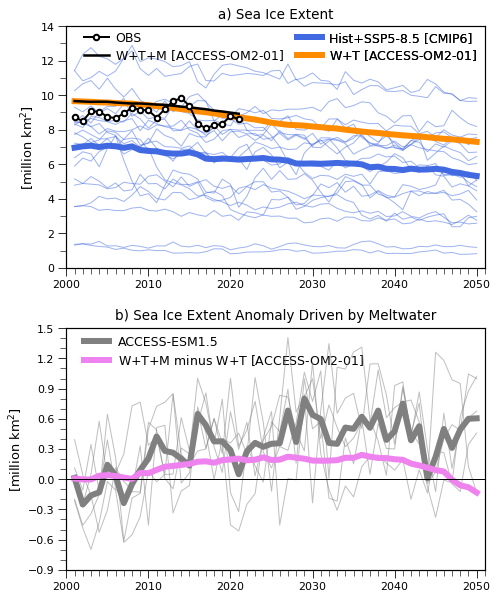

In [6]:
make_plot()